In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
oil=pd.read_csv("drive/MyDrive/oil.csv")
holidays=pd.read_csv("drive/MyDrive/holidays_events.csv")
transactions=pd.read_csv("drive/MyDrive/transactions.csv")
data=pd.read_csv("drive/MyDrive/train.csv")
stores=pd.read_csv("drive/MyDrive/stores.csv")
test=pd.read_csv("drive/MyDrive/test.csv")

In [ ]:
datas=data.copy()
muestra=datas.sample(frac=0.1)
muestra["date"]=pd.to_datetime(muestra["date"])
muestra['year'] = muestra['date'].dt.year
muestra['month'] = muestra['date'].dt.month
muestra['day'] = muestra['date'].dt.day
muestra['dayofweek'] = muestra['date'].dt.dayofweek
muestra.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')

                sales                                                \
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2013-01-01        0.0       0.0    2.0     810.0   0.0    180.58900   
2013-01-02      255.0       0.0  207.0   72092.0   0.0  26246.31900   
2013-01-03      161.0       0.0  125.0   52105.0   0.0  18456.48002   
2013-01-04      169.0       0.0  133.0   54167.0   0.0  16721.96901   
2013-01-05      342.0       0.0  191.0   77818.0   0.0  22367.76108   

                                                       ...            \
family     CELEBRATION CLEANING    DAIRY         DELI  ... MAGAZINES   
date                                                   ...             
2013-01-01         0.0    186.0    143.0     71.09000  ...       0.0   
2013-01-02         0.0  74629.0  23381.0  15754.50000  ...       0.0   
2013-01-03         0.0  55893.0  18001.0  11172.45500  ...       0.0   

KeyError: 'BOOKS'

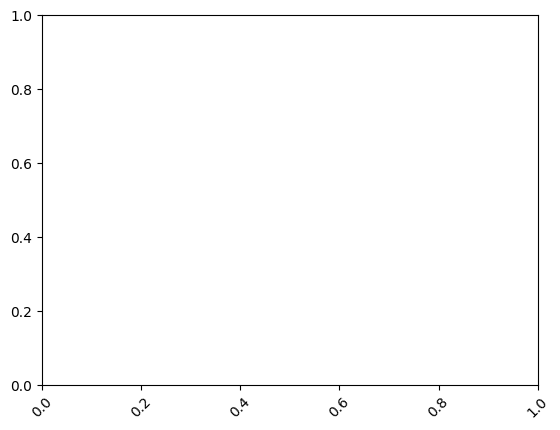

In [ ]:
data_pivot = pd.pivot_table(data, index='date', columns='family',values=['sales'], aggfunc='sum')
#csvで書き出し
data_pivot.to_csv('drive/MyDrive/data_pivot.csv')
print(data_pivot.head())
fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax.plot(data_pivot.index, data_pivot["BOOKS"])
ax.set_xlabel('date')
ax.set_ylabel('book')
plt.show()

Text(0.5, 1.0, 'Sales per Family')

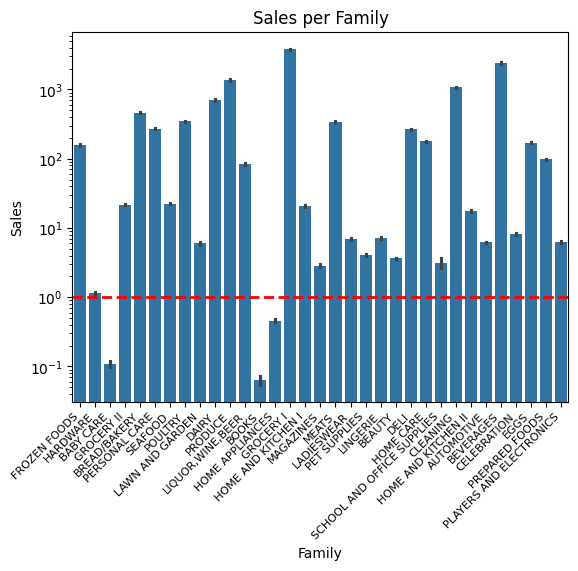

In [ ]:
sns.barplot(data=muestra,x="family",y="sales",)
plt.xticks(rotation=45,ha="right",fontsize=8)
plt.axhline(y=1, color='r', linestyle='--', linewidth=2)
plt.yscale("log")
plt.xlabel('Family')
plt.ylabel('Sales')
plt.title('Sales per Family')

Text(0.5, 1.0, 'Sales per Store')

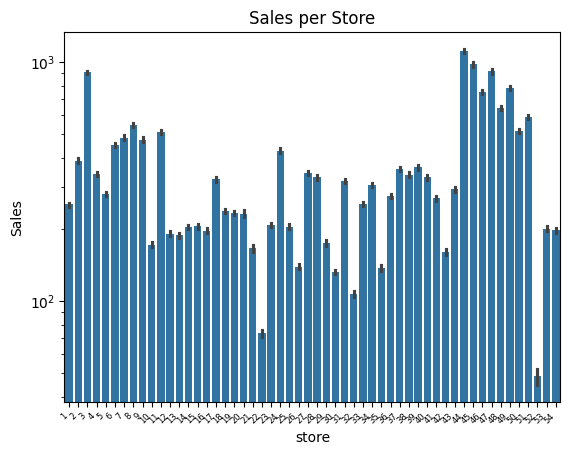

In [ ]:
sns.barplot(data=muestra,x="store_nbr",y="sales",)
plt.xticks(rotation=45,ha="right",fontsize=6)
plt.yscale("log")
plt.xlabel('store')
plt.ylabel('Sales')
plt.title('Sales per Store')

In [ ]:
oil["date"]=pd.to_datetime(oil["date"])
oil['year'] = oil['date'].dt.year
oil['month'] = oil['date'].dt.month
oil['day'] = oil['date'].dt.day
oil['dayofweek'] = oil['date'].dt.dayofweek
oil=oil.dropna()


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(oil['date'], oil['dcoilwtico'], marker='o')
plt.xlabel('Date')
plt.ylabel('Oil')
plt.title('Oil price along time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
holidays["date"]=pd.to_datetime(holidays["date"])
holidays['year'] = holidays['date'].dt.year
holidays['month'] = holidays['date'].dt.month
holidays['day'] = holidays['date'].dt.day
holidays['dayofweek'] = holidays['date'].dt.dayofweek
holidays=holidays.dropna()
plt.figure(figsize=(10, 5))
holidays


,date,type,locale,locale_name,description,transferred,year,month,day,dayofweek
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,2012,3,2,4
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,2012,4,1,6
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,2012,4,12,3
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,2012,4,14,5
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,2012,4,21,5
...,...,...,...,...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False,2017,12,22,4
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False,2017,12,23,5
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False,2017,12,24,6
348,2017-12-25,Holiday,National,Ecuador,Navidad,False,2017,12,25,0


<Figure size 1000x500 with 0 Axes>

In [ ]:

transactions["date"]=pd.to_datetime(transactions["date"])
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
transactions['day'] = transactions['date'].dt.day
transactions['dayofweek'] = transactions['date'].dt.dayofweek
transactions=transactions.dropna()
plt.figure(figsize=(10, 5))
transactions

,date,store_nbr,transactions,year,month,day,dayofweek
0,2013-01-01,25,770,2013,1,1,1
1,2013-01-02,1,2111,2013,1,2,2
2,2013-01-02,2,2358,2013,1,2,2
3,2013-01-02,3,3487,2013,1,2,2
4,2013-01-02,4,1922,2013,1,2,2
...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,15,1
83484,2017-08-15,51,1573,2017,8,15,1
83485,2017-08-15,52,2255,2017,8,15,1
83486,2017-08-15,53,932,2017,8,15,1


<Figure size 1000x500 with 0 Axes>

In [ ]:
muestra.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')

In [ ]:
oil.columns

Index(['date', 'dcoilwtico', 'year', 'month', 'day', 'dayofweek'], dtype='object')

In [ ]:
muestra_oil = muestra.merge(oil, on=["year", "month", "day"], how="left")
muestra_oil = muestra_oil.drop(axis=1, columns=["dayofweek_x", "date_y", "dayofweek_y"])
muestra_oil = muestra_oil.rename({'date_x': 'date'}, axis='columns')
muestra_oil.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'dcoilwtico'],
      dtype='object')

In [ ]:
holidays.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred',
       'year', 'month', 'day', 'dayofweek'],
      dtype='object')

In [ ]:
muestra_oil_holidays = muestra_oil.merge(holidays, on=["year", "month", "day"], how="left")
muestra_oil_holidays = muestra_oil_holidays.drop(columns=["date_y"])
muestra_oil_holidays = muestra_oil_holidays.rename({'date_x': 'date'}, axis='columns')
muestra_oil_holidays.columns



Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'dcoilwtico', 'type', 'locale', 'locale_name',
       'description', 'transferred', 'dayofweek'],
      dtype='object')

In [ ]:
muestra_oil_holidays[['locale', 'locale_name']].sample(100)

,locale,locale_name
2279348,NaN,NaN
2122310,NaN,NaN
213855,National,Ecuador
743961,NaN,NaN
2466460,NaN,NaN
...,...,...
1618647,NaN,NaN
403684,NaN,NaN
645480,National,Ecuador
2891775,NaN,NaN


In [ ]:
transactions.columns


Index(['date', 'store_nbr', 'transactions', 'year', 'month', 'day',
       'dayofweek'],
      dtype='object')

In [ ]:
muestra_oil_holidays_tra = muestra_oil_holidays.merge(transactions, on=["year", "month", "day","store_nbr"], how="left")
muestra_oil_holidays_tra = muestra_oil_holidays_tra.drop(columns=["dayofweek_y","date_y"])
muestra_oil_holidays_tra = muestra_oil_holidays.rename({'date_x': 'date'}, axis='columns')
muestra_oil_holidays_tra = muestra_oil_holidays.rename({'dayofweek_x': 'dayofweek'}, axis='columns')
muestra_oil_holidays_tra.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'dcoilwtico', 'type', 'locale', 'locale_name',
       'description', 'transferred', 'dayofweek'],
      dtype='object')

In [ ]:
stores.head()
stores = stores.rename({'type': 'TYPE'}, axis='columns')

In [ ]:
union = muestra_oil_holidays_tra.merge(stores, on=["store_nbr"], how="left")
union.columns
print(union.head(30))


         id       date  store_nbr                      family       sales  \
0   1750987 2015-09-12         39                    CLEANING  1607.00000   
1    718473 2014-02-09         18                     PRODUCE     0.00000   
2    492176 2013-10-04         19                    HARDWARE     0.00000   
3   2964660 2017-07-26         42                 CELEBRATION    14.00000   
4    493865 2013-10-05         16             LAWN AND GARDEN     0.00000   
5     29922 2013-01-17         48                       MEATS  1106.74100   
6   2186900 2016-05-15          2                   MAGAZINES     9.00000   
7    167720 2013-04-05         15                    HARDWARE     2.00000   
8   2635472 2017-01-22          6                PET SUPPLIES    16.00000   
9    716053 2014-02-07          5                  LADIESWEAR     0.00000   
10   441701 2013-09-05         51              PREPARED FOODS   161.36500   
11   818868 2014-04-06         35                 CELEBRATION     0.00000   

In [ ]:
union_dummies_ = pd.get_dummies(data=union, columns=['transferred'], drop_first=True)
print(union_dummies_.head(10))

        id       date  store_nbr           family     sales  onpromotion  \
0  1750987 2015-09-12         39         CLEANING  1607.000            7   
1   718473 2014-02-09         18          PRODUCE     0.000            0   
2   492176 2013-10-04         19         HARDWARE     0.000            0   
3  2964660 2017-07-26         42      CELEBRATION    14.000            1   
4   493865 2013-10-05         16  LAWN AND GARDEN     0.000            0   
5    29922 2013-01-17         48            MEATS  1106.741            0   
6  2186900 2016-05-15          2        MAGAZINES     9.000            0   
7   167720 2013-04-05         15         HARDWARE     2.000            0   
8  2635472 2017-01-22          6     PET SUPPLIES    16.000            0   
9   716053 2014-02-07          5       LADIESWEAR     0.000            0   

   year  month  day  dcoilwtico   type    locale locale_name  \
0  2015      9   12         NaN    NaN       NaN         NaN   
1  2014      2    9         NaN    

In [ ]:
union_dummies = pd.get_dummies(data=union, columns=["year",'month','day',"family","type",'transferred','city','state','TYPE','cluster'], drop_first=True)

In [ ]:
union_dummies = union_dummies.dropna()
x = union_dummies.drop(axis=1, columns=["id", "date", "sales","description","dayofweek","locale_name","locale"])
y = union_dummies["sales"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
Results = {
    "Classifier": [],
    "MSE": []
}


In [ ]:
model1 = RandomForestRegressor()
model1.fit(xtrain, ytrain)
prediction1 = model1.predict(xtest)
mse1 = mean_squared_error(ytest, prediction1)
Results["Classifier"].append("RandomForestRegressor")
Results["MSE"].append(mse1)

In [ ]:
model2 = AdaBoostRegressor()
model2.fit(xtrain, ytrain)
prediction2 = model2.predict(xtest)
mse2 = mean_squared_error(ytest, prediction2)
Results["Classifier"].append("AdaBoostRegressor")
Results["MSE"].append(mse2)

In [ ]:
model3 = SGDRegressor()
model3.fit(xtrain, ytrain)
prediction3 = model3.predict(xtest)
mse3 = mean_squared_error(ytest, prediction3)
Results["Classifier"].append("SGDRegressor")
Results["MSE"].append(mse3)

In [ ]:
results = pd.DataFrame(Results)
print(results)

"""
oilだけ
              Classifier           MSE
0  RandomForestRegressor  9.693120e+04
1      AdaBoostRegressor  1.174074e+06
2           SGDRegressor  1.136044e+29

全て
              Classifier           MSE
0  RandomForestRegressor  1.355509e+05
1      AdaBoostRegressor  3.752315e+06
2           SGDRegressor  3.776126e+28
"""

              Classifier           MSE
0  RandomForestRegressor  3.626561e+05
1      AdaBoostRegressor  2.530590e+06
2           SGDRegressor  5.676894e+20


'\noilだけ\n              Classifier           MSE\n0  RandomForestRegressor  9.693120e+04\n1      AdaBoostRegressor  1.174074e+06\n2           SGDRegressor  1.136044e+29\n\n全て\n              Classifier           MSE\n0  RandomForestRegressor  1.355509e+05\n1      AdaBoostRegressor  3.752315e+06\n2           SGDRegressor  3.776126e+28\n'

In [ ]:
params={
    "n_estimators":[200,250,300],
    "max_depth":[None,3,5],
    "min_samples_split":[None,1,2],
    "min_samples_leaf":[None,1,2]
}
forest=RandomForestRegressor()
Search=GridSearchCV(estimator=forest,param_grid=params,scoring="neg_mean_squared_error",n_jobs=3)
Search.fit(xtrain,ytrain)
print("Best Parameters found:")
print(Search.best_params_)
print("Best MSE Score:")
print(Search.best_score_)
y_pred = Search.best_estimator_.predict(xtest)
Final_mse = mean_squared_error(ytest, y_pred)
print("Final MSE = ",Final_mse)
# Best Parameters found:
# {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}
#Final MSE =  123147.0847355417

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
315 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py",

Best Parameters found:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}
Best MSE Score:
-120402.915444142
Final MSE =  123147.0847355417


In [ ]:
final_forest=RandomForestRegressor(max_depth=None, min_samples_leaf= 2, min_samples_split= 2, n_estimators=250)
final_forest.fit(xtrain,ytrain)
prediction_final=final_forest.predict(xtest)
Final_r2_score=r2_score(ytest,prediction_final)
print("Final R2 score =",Final_r2_score)
#Final R2 score = 0.883276595898445

Final R2 score = 0.724105695737103
